In [7]:
import pandas as pd
# Load dataset
df = pd.read_csv("Mall_Customers.csv")
# Show first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# statistics details
print(df.describe())


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [12]:
# to check for Missing Values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
 # to check for duplicate Values
df.duplicated().sum()

0

In [18]:
# Convert all text to lowercase
df['Gender'] = df['Gender'].str.lower()
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    male   19                  15                      39
1             2    male   21                  15                      81
2             3  female   20                  16                       6
3             4  female   23                  16                      77
4             5  female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  female   35                 120                      79
196         197  female   45                 126                      28
197         198    male   32                 126                      74
198         199    male   32                 137                      18
199         200    male   30                 137                      83

[200 rows x 5 columns]


In [23]:
df.rename(columns={
    'CustomerID': 'Customer_ID',
    'Gender': 'Gender',
    'Age': 'Age',
    'Annual Income (k$)': 'Annual_Income_k',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)
# Check columns
df.columns


Index(['Customer_ID', 'Gender', 'Age', 'Annual_Income_k', 'Spending_Score'], dtype='object')

In [30]:
# Adding new date column (random or same date for all)
df['Visit_Date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='D')
df

,Customer_ID,Gender,Age,Annual_Income_k,Spending_Score,Visit_Date
0,1,male,19,15,39,2024-01-01
1,2,male,21,15,81,2024-01-02
2,3,female,20,16,6,2024-01-03
3,4,female,23,16,77,2024-01-04
4,5,female,31,17,40,2024-01-05
...,...,...,...,...,...,...
195,196,female,35,120,79,2024-07-14
196,197,female,45,126,28,2024-07-15
197,198,male,32,126,74,2024-07-16
198,199,male,32,137,18,2024-07-17


In [31]:
# Converting to dd-mm-yyyy format
df['Visit_Date'] = pd.to_datetime(df['Visit_Date']).dt.strftime('%d-%m-%Y')
df.head()

,Customer_ID,Gender,Age,Annual_Income_k,Spending_Score,Visit_Date
0,1,male,19,15,39,01-01-2024
1,2,male,21,15,81,02-01-2024
2,3,female,20,16,6,03-01-2024
3,4,female,23,16,77,04-01-2024
4,5,female,31,17,40,05-01-2024


In [32]:
# Sort data by Age in ascending order
df = df.sort_values(by='Age', ascending=True)
df.head()

,Customer_ID,Gender,Age,Annual_Income_k,Spending_Score,Visit_Date
91,92,male,18,59,41,01-04-2024
33,34,male,18,33,92,03-02-2024
65,66,male,18,48,59,06-03-2024
114,115,female,18,65,48,24-04-2024
111,112,female,19,63,54,21-04-2024


In [61]:
# Sort data by Age in descending order
df = df.sort_values(by='Age', ascending=False)
df.head()

,Customer_ID,Gender,Age,Annual_Income_k,Spending_Score,Visit_Date,Age_Group
70,71,male,70,49,55,11-03-2024,NaN
60,61,male,70,46,56,01-03-2024,NaN
57,58,male,69,44,46,27-02-2024,NaN
90,91,female,68,59,55,31-03-2024,NaN
67,68,female,68,48,48,08-03-2024,NaN


In [42]:
# average spending according to Gender:
df.groupby('Gender')['Spending_Score'].mean()

Gender
female    51.526786
male      48.511364
Name: Spending_Score, dtype: float64

In [43]:
df.groupby('Age')['Annual_Income_k'].mean()

Age
18     51.250000
19     57.000000
20     41.600000
21     38.800000
22     31.333333
23     41.500000
24     39.250000
25     57.666667
26     58.000000
27     63.166667
28     85.250000
29     63.600000
30     76.142857
31     48.375000
32     87.181818
33     80.333333
34     79.000000
35     46.666667
36     81.000000
37     65.000000
38     74.500000
39     72.666667
40     61.666667
41    101.000000
42     60.000000
43     65.666667
44     75.500000
45     69.333333
46     59.000000
47     70.166667
48     58.200000
49     51.000000
50     58.600000
51     55.500000
52     55.500000
53     39.500000
54     59.750000
55     57.000000
56     79.000000
57     64.500000
58     54.000000
59     65.250000
60     43.333333
63     56.500000
64     19.000000
65     50.500000
66     63.000000
67     45.500000
68     56.666667
69     44.000000
70     47.500000
Name: Annual_Income_k, dtype: float64

In [48]:
#query customers income more than 100 हे:
high_income = df[df['Annual_Income_k'] > 100]
print(high_income)

     Customer_ID  Gender  Age  Annual_Income_k  Spending_Score  Visit_Date
186          187  female   54              101              24  05-07-2024
194          195  female   47              120              16  13-07-2024
196          197  female   45              126              28  15-07-2024
188          189  female   41              103              17  07-07-2024
193          194  female   38              113              91  12-07-2024
189          190  female   36              103              85  08-07-2024
195          196  female   35              120              79  14-07-2024
190          191  female   34              103              23  09-07-2024
192          193    male   33              113               8  11-07-2024
198          199    male   32              137              18  17-07-2024
191          192  female   32              103              69  10-07-2024
197          198    male   32              126              74  16-07-2024
199          200    male 

/tmp/ipykernel_7331/3822094721.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = df.groupby('Age_Group')['Spending_Score'].mean()


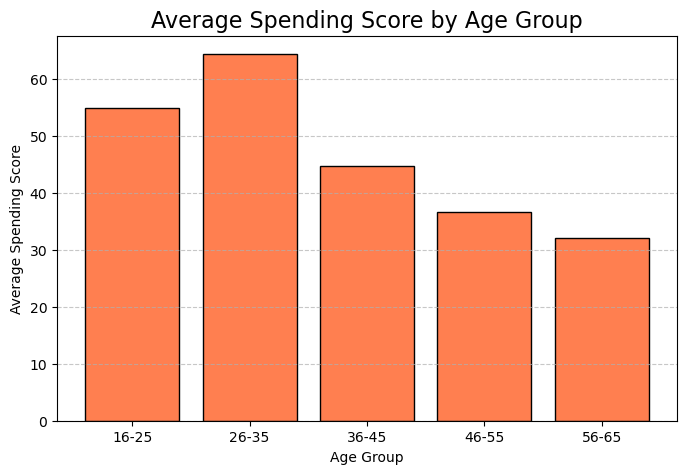

In [59]:
# age groups
bins = [15, 25, 35, 45, 55, 65]
labels = ['16-25', '26-35', '36-45', '46-55', '56-65']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Group by age group and calculate mean spending
age_group_spending = df.groupby('Age_Group')['Spending_Score'].mean()

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(age_group_spending.index, age_group_spending.values, color='coral', edgecolor='black')
plt.title('Average Spending Score by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()